In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.cosmology import Planck18
from scipy.constants import c
c= c*1e-3 #in km/s
import os
# FeII doublet values
from linetools.lists.linelist import LineList
linelist = LineList('ISM', verbose=False)
line1 = linelist['FeII 2374']
fe1 = line1['wrest'].value
line2 = linelist['FeII 2382']
fe2 = line2['wrest'].value
print(f"FeII first doublet = {fe1}\n" f"FeII second doublet = {fe2}\n" f"speed of light in vacuum in km/s = {c}")

# Configure NumPy to print all elements
np.set_printoptions(threshold=np.inf)

file= 'dr2_main_09_astropy.fits'
hdul = fits.open(file)

read_sets: Using set file -- 
  /home/mehak-gupta/jupyter-venv/lib/python3.12/site-packages/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
FeII first doublet = 2374.4612
FeII second doublet = 2382.7652
speed of light in vacuum in km/s = 299792.458


In [2]:
# summary of the file
#hdul.info()

In [3]:
# primary header
hdr = hdul[0].header
print(repr(hdr))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  


In [4]:
# primary data 
data = hdul[0].data
print(data)
hdul.close()

None


In [5]:
# the binary table
catalog = Table.read('dr2_main_09_astropy.fits', hdu=1)

#print(catalog.colnames)

#print(catalog)

ID = catalog['ID']  
zconf = catalog['ZCONF']
z= catalog['Z']
ra = catalog['RA']
dec= catalog['DEC']
mass= catalog['MASS_PRO']
sfr= catalog['SFR_PRO']
#print(ID,zconf)

# id zconf z
arr = np.array([ID,zconf,z,ra,dec,mass,sfr]).T  # Transpose to arrange as columns
#print(arr)
print('total sources=',len(arr))
print('median of stellar mass = ',np.nanmedian(arr[:,5]))
print('median of star formation rate = ',np.nanmedian(arr[:,6]))

total sources= 2221
median of stellar mass =  8.79440815488216
median of star formation rate =  -0.35559904000926


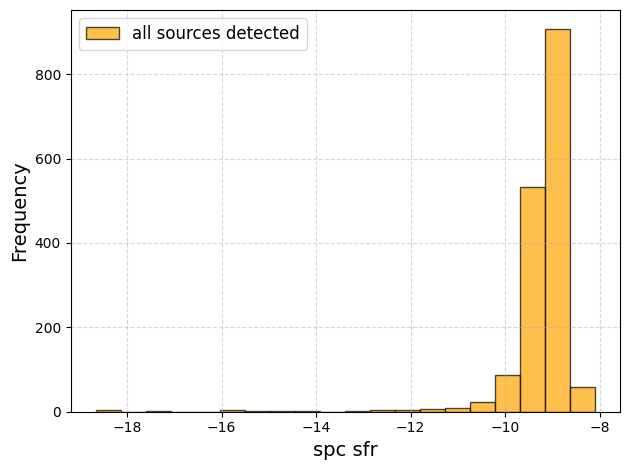

min z=  nan max z= nan median =  -9.052326155847606 bins= 20


In [6]:
spc=-arr[:,5]+arr[:,6]
plt.hist(spc, bins=20, color='orange', edgecolor='black', alpha=0.7, label='all sources detected')
#plt.title("Sources(2221)", fontsize=16, fontweight='bold') 
plt.xlabel("spc sfr", fontsize=14)                                  
plt.ylabel("Frequency", fontsize=14)  
#plt.xticks(np.arange(0,7,0.5))
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min z= ',np.min(spc),'max z=',np.max(spc),'median = ',np.nanmedian(spc),'bins=',20)

In [7]:
# sources with zconf>1
filter1_arr = arr[(arr[:, 1] > 1) & (arr[:,2]>0)]

#print(filter1_arr)
print('sources with zconf>1 and z>0=',len(filter1_arr))
print('sources with negative redshift z<0=',len(z[z<0]))


sources with zconf>1 and z>0= 1707
sources with negative redshift z<0= 4


In [8]:
#muse range in agm (step 1.25 agm)
r1=4700
r2=9350

fe1_z1=(r1/fe1)-1
fe1_z2=(r2/fe1)-1
fe2_z1=(r1/fe2)-1
fe2_z2=(r2/fe2)-1
print('for FeII line 1=',fe1_z1,fe1_z2)
print('for FeII line 2=',fe2_z1,fe2_z2)

for FeII line 1= 0.9793964205437427 2.9377354323582963
for FeII line 2= 0.9724981714522272 2.9240123198038988


In [9]:
#potential sources in suitable z range for MgII line
z_low=max(fe1_z1,fe2_z1)
z_up=min(fe1_z2,fe2_z2)
filter2_arr = filter1_arr[(filter1_arr[:, 2] > z_low) & (filter1_arr[:, 2] < z_up)]#foreground
filter1_arr = filter1_arr[filter1_arr[:,2]>z_low]#background


#print(filter2_arr)
print('potential sources (',z_low,'<z<',z_up,')=',len(filter2_arr))

potential sources ( 0.9793964205437427 <z< 2.9240123198038988 )= 455


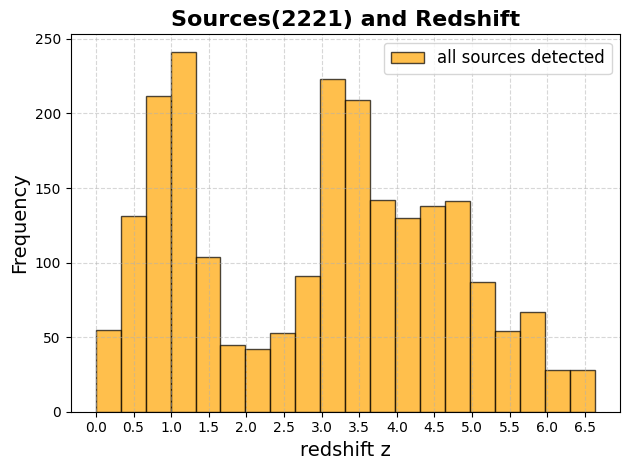

min z=  -0.00359917440514157 max z= 6.63502285545596 median =  3.16445259511186 bins= 20


/home/mehak-gupta/jupyter-venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [10]:
plt.hist(z, bins=20, color='orange', edgecolor='black', alpha=0.7, label='all sources detected')
plt.title("Sources(2221) and Redshift", fontsize=16, fontweight='bold') 
plt.xlabel("redshift z", fontsize=14)                                  
plt.ylabel("Frequency", fontsize=14)  
plt.xticks(np.arange(0,7,0.5))
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min z= ',np.min(z),'max z=',np.max(z),'median = ',np.median(z),'bins=',20)

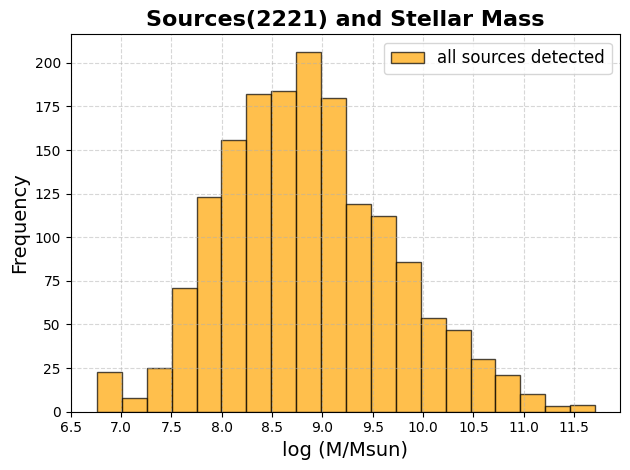

min =  6.76087864052868 max = 11.7091210980298 median =  8.79440815488216 bins= 20


In [11]:
plt.hist(mass, bins=20, color='orange', edgecolor='black', alpha=0.7, label='all sources detected')
plt.title("Sources(2221) and Stellar Mass", fontsize=16, fontweight='bold') 
plt.xlabel("log (M/Msun)", fontsize=14)                                  
plt.ylabel("Frequency", fontsize=14)  
plt.xticks(np.arange(6.5,12,0.5))
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min = ',np.min(mass),'max =',np.max(mass),'median = ',np.nanmedian(arr[:,5]),'bins=',20)

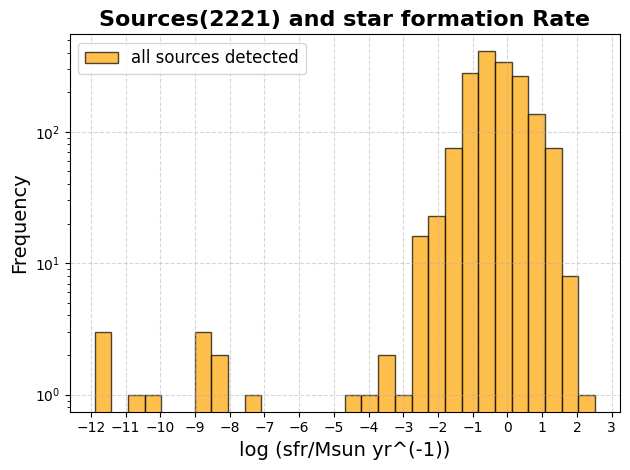

min =  -11.893524181141 max = 2.52009114902045 median =  -0.35559904000926 bins= 20


In [12]:
plt.hist(sfr, bins=30, color='orange', edgecolor='black', alpha=0.7, label='all sources detected')
plt.title("Sources(2221) and star formation Rate", fontsize=16, fontweight='bold') 
plt.xlabel("log (sfr/Msun yr^(-1))", fontsize=14)                                  
plt.ylabel("Frequency", fontsize=14)  
plt.yscale('log')
plt.xticks(np.arange(-12,4,1))
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min = ',np.min(sfr),'max =',np.max(sfr),'median = ',np.nanmedian(arr[:,6]),'bins=',20)

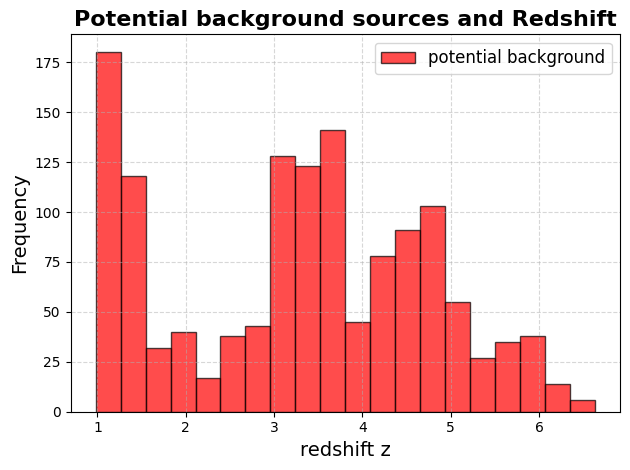

min z=  0.97948472849141 max z= 2.9197563299331 bins= 20
1352


In [13]:
plt.hist(filter1_arr[:,2], bins=20, color='red', edgecolor='black', alpha=0.7, label='potential background')
plt.title("Potential background sources and Redshift", fontsize=16, fontweight='bold')  
plt.xlabel("redshift z", fontsize=14)                                
plt.ylabel("Frequency", fontsize=14)                              
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min z= ',np.min(filter2_arr[:,2]),'max z=',np.max(filter2_arr[:,2]),'bins=',20)
print(len(filter1_arr[:,2]))

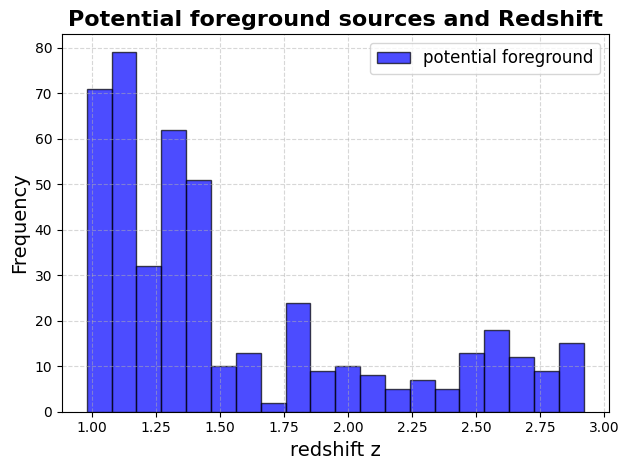

min z=  0.97948472849141 max z= 2.9197563299331 bins= 20


In [14]:
plt.hist(filter2_arr[:,2], bins=20, color='blue', edgecolor='black', alpha=0.7, label='potential foreground')
plt.title("Potential foreground sources and Redshift", fontsize=16, fontweight='bold')  
plt.xlabel("redshift z", fontsize=14)                                
plt.ylabel("Frequency", fontsize=14)                              
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.legend(fontsize=12)                                           
plt.tight_layout()                                                
plt.show()
print('min z= ',np.min(filter2_arr[:,2]),'max z=',np.max(filter2_arr[:,2]),'bins=',20)

In [15]:
dv=3e3 #km/s

results = []
k=0
# Outer loop over background sources
for i in range(len(filter1_arr)):
    dz = (dv / c) * (filter1_arr[i, 2] + 1)  # Compute dz

    # Inner loop over foreground sources
    for j in range(len(filter2_arr)):
        if filter1_arr[i, 2] - dz > filter2_arr[j, 2]:  # Check condition
            # Combine the data into a flat array (ensure plain values)
            bg_data = filter1_arr[i, :].flatten()  # Background data (NumPy array)
            fr_data = filter2_arr[j, :].flatten()  # Foreground data (NumPy array)
            combined_row = np.hstack((bg_data, fr_data))
            results.append(combined_row)

# Convert results to a NumPy array
pairs = np.array(results)

# Print the number of pairs
num_pairs=pairs.shape[0]
print('Number of potential pairs:', num_pairs)

# Optionally, print the first pair for verification
if pairs.size > 0:
    print("\nFirst pair (if exists):", pairs[44])
else:
    print("\nNo matching pairs found.")


Number of potential pairs: 505065

First pair (if exists): [ 8.00000000e+00  3.00000000e+00  1.09528887e+00  5.31661781e+01
 -2.77875161e+01  1.08337473e+01  1.47352011e+00  1.92300000e+03
  3.00000000e+00  9.89998100e-01  5.31798210e+01 -2.77933464e+01
  7.98582444e+00 -1.31761874e+00]


In [16]:
# Extract RA, Dec, and distances for background and foreground sources from pairs
ra_bg = pairs[:, 3]  # RA for background sources
dec_bg = pairs[:, 4]  # Dec for background sources 
z_for_scale=pairs[:,9]   #redshift of foreground
ra_fr = pairs[:, 10]  # RA for foreground sources
dec_fr = pairs[:, 11]  # Dec for foreground sources

# Create SkyCoord objects for all background and foreground sources
source_bg = SkyCoord(ra=ra_bg * u.degree, dec=dec_bg * u.degree, frame='icrs')
source_fr = SkyCoord(ra=ra_fr * u.degree, dec=dec_fr * u.degree, frame='icrs')

# Calculate angular separations in radians (vectorized)
angular_separations = source_bg.separation(source_fr).to(u.arcminute).value  # default in degree
scale=Planck18.kpc_proper_per_arcmin(z_for_scale)

# Calculate physical separations (vectorized)
physical_separations = angular_separations*scale  #kpc

# Combine physical separations into a NumPy array
separations_array = np.array(physical_separations.value)


In [17]:
#shifting spectrum of bg source to the redshift of foreground

# Define column names and data
column_names = ["ID_bg", "ID_fore", "z_fore", "Mass" , "SFR" , "Separation"]

# Extract and reshape the columns so that each becomes an (n,1) array
id_bg = pairs[:, 0].reshape(-1, 1)
id_fore = pairs[:, 7].reshape(-1, 1)
redshift_fore = pairs[:, 9].reshape(-1, 1)
mass_fore = pairs[:,12].reshape(-1,1)
sfr_fore = pairs[:,13].reshape(-1,1)
Separations = separations_array.reshape(-1, 1)

# Print the shapes to verify
print(id_bg.shape, id_fore.shape, redshift_fore.shape, mass_fore.shape , sfr_fore.shape , Separations.shape)

# Combine the columns into one 2D array with shape (n, 4)
data_array = np.hstack([id_bg, id_fore, redshift_fore,mass_fore,sfr_fore, Separations])

# Write the header and data to a text file
output_file = '/home/mehak-gupta/mehak/project/UDF_HUDF_sources_FULL /FeII_2374_2382/redshift_fe.txt'
with open(output_file, "w") as f:
    # Write header: join column names with tab delimiters
    f.write("\t".join(column_names) + "\n")
    # Write the data rows using np.savetxt
    # Adjust fmt as needed (here, all columns will be formatted as floats with 2 decimals)
    np.savetxt(f, data_array, fmt="%.4f", delimiter="\t")

print("Data written successfully to", output_file)


(505065, 1) (505065, 1) (505065, 1) (505065, 1) (505065, 1) (505065, 1)
Data written successfully to /home/mehak-gupta/mehak/project/UDF_HUDF_sources_FULL /FeII_2374_2382/redshift_fe.txt


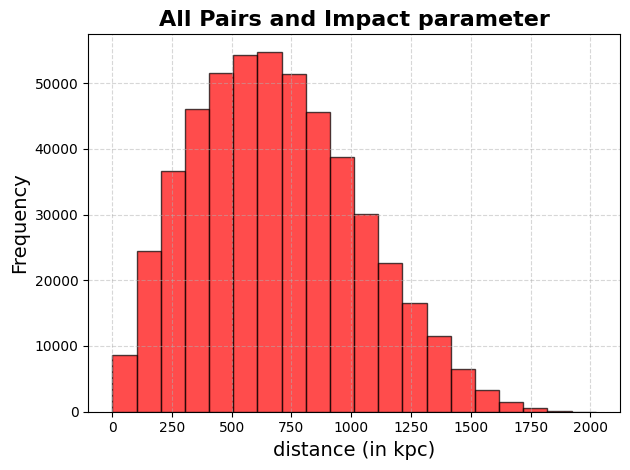

min separation=  0.7731529741587053 max separation= 2023.2080484406013 bins= 20


In [18]:
plt.hist(separations_array, bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("All Pairs and Impact parameter", fontsize=16, fontweight='bold')  
plt.xlabel("distance (in kpc)", fontsize=14)                                
plt.ylabel("Frequency", fontsize=14)                              
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.tight_layout()                                                
plt.show()
#print(np.median(separations_array))
print('min separation= ',np.min(separations_array),'max separation=',np.max(separations_array),'bins=',20)

No. of pairs in chosen range (100 kpc to 500 kpc)= 23871


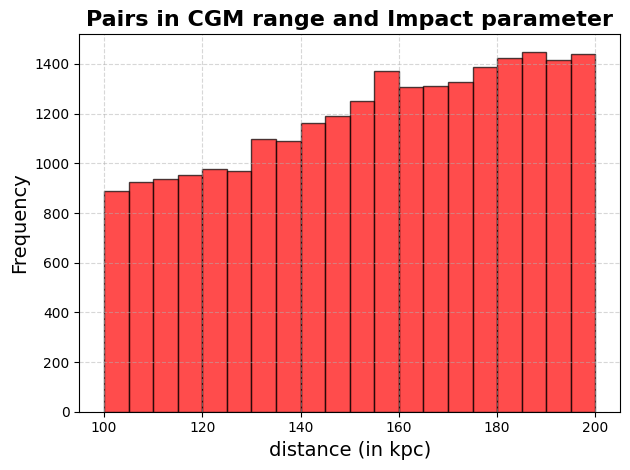

In [19]:
sep=separations_array[(separations_array > 100) & (separations_array<200)]
print('No. of pairs in chosen range (100 kpc to 500 kpc)=',len(sep))
plt.hist(sep, bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("Pairs in CGM range and Impact parameter", fontsize=16, fontweight='bold')  
plt.xlabel("distance (in kpc)", fontsize=14)                                
plt.ylabel("Frequency", fontsize=14)                              
plt.grid(True, linestyle='--', alpha=0.5)                         
plt.tight_layout()                                                
plt.show()

In [20]:
bg = []
for i in range(len(pairs) - 1):
    if pairs[i, 0] != pairs[i + 1, 0]:
        bg.append(int(pairs[i, 0]))

# Add the last element of the column if it's unique
if len(pairs) > 0 and (len(bg) == 0 or bg[-1] != pairs[-1, 0]):
    bg.append(int(pairs[-1, 0]))

# Remove any duplicates to ensure unique values
bg = list(set(bg))

# Print the count of unique values
print(len(bg))

# Save unique values to a text file
with open("bg_id_FeII_2374_2382.txt", "w") as file:
    for item in sorted(bg):  # Optional: sort the unique values
        file.write(f"{item}\n")


1321
